# <u><center><font color=blue>**_Tracking & Tracing of Fake News_**</font></center></u>

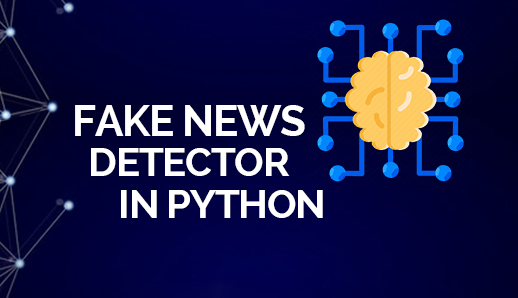

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:\\Users\\Bhanu\\Desktop\\Python_Hub\\fake-news'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Bhanu\Desktop\Python_Hub\fake-news\test.csv
C:\Users\Bhanu\Desktop\Python_Hub\fake-news\train.csv


In [2]:
# load in training and test data
train = pd.read_csv("C:\\Users\\Bhanu\\Desktop\\Python_Hub\\fake-news\\train.csv")
test = pd.read_csv("C:\\Users\\Bhanu\\Desktop\\Python_Hub\\fake-news\\test.csv")
print(train.shape, test.shape)

(20800, 5) (5200, 4)


# <u><font color="red">Exploring the data</font></u>

In [3]:
# check data
# 1 = unreliable
# 0 = reliable
train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
# check data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
# printing some unreliable information, seems to be an opinion piece
print(train["text"][2])

Why the Truth Might Get You Fired October 29, 2016 
The tension between intelligence analysts and political policymakers has always been between honest assessments and desired results, with the latter often overwhelming the former, as in the Iraq War, writes Lawrence Davidson. 
By Lawrence Davidson 
For those who might wonder why foreign policy makers repeatedly make bad choices, some insight might be drawn from the following analysis. The action here plays out in the United States, but the lessons are probably universal. 
Back in the early spring of 2003, George W. Bush initiated the invasion of Iraq. One of his key public reasons for doing so was the claim that the country’s dictator, Saddam Hussein, was on the verge of developing nuclear weapons and was hiding other weapons of mass destruction. The real reason went beyond that charge and included a long-range plan for “regime change” in the Middle East. President George W. Bush and Vice President Dick Cheney receive an Oval Office b

In [6]:
# printing some reliable information
print(train["text"][1])

Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mort

<AxesSubplot:xlabel='count', ylabel='label'>

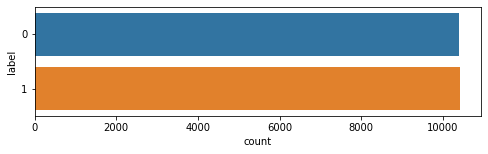

In [7]:
# visualise data

import matplotlib.pyplot as plt
import seaborn as sns

# seeing the balance of the two labels 
# 1 = unreliable / fake
# 0 = reliable / real
plt.figure(figsize = (8, 2))
sns.countplot(y = train.label)

In [8]:
# check nulls
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
dtype: int64


# <u><font color="red">Preprocessing the data</font></u>

In [9]:
# preprocessing the data 

# drop the null rows
train = train.dropna()
train.shape

(18285, 5)

<AxesSubplot:xlabel='count', ylabel='label'>

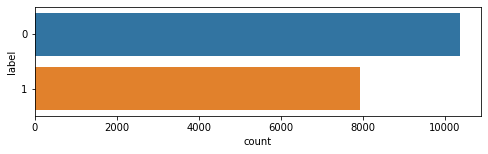

In [10]:
# seeing the balance of the two labels 
# 1 = unreliable / fake
# 0 = reliable / real
plt.figure(figsize = (8, 2))
sns.countplot(y = train.label)

In [11]:
train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
# combine the data into one vector
train["all"] = train.title + " " + train.text

In [13]:
# check nulls
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
all       0
dtype: int64

In [14]:
from nltk.corpus import stopwords
# Stemming :- Noramalize words into its base form or its form
from nltk.stem import PorterStemmer
import re
from string import punctuation

# create a list of stop words - common words that will have little to no predictive value
stop_words = stopwords.words("english")

# stems words such as plurals (not that accurate)
ps = PorterStemmer()

def preprocess(text):

    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower().split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    text = " ".join(text)
    text = "".join(p for p in text if p not in punctuation)
    
    return text



train["cleaned"] = train["all"].apply(preprocess)

In [15]:
train["cleaned"][0]

'hous dem aid even see comey letter jason chaffetz tweet hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know ant

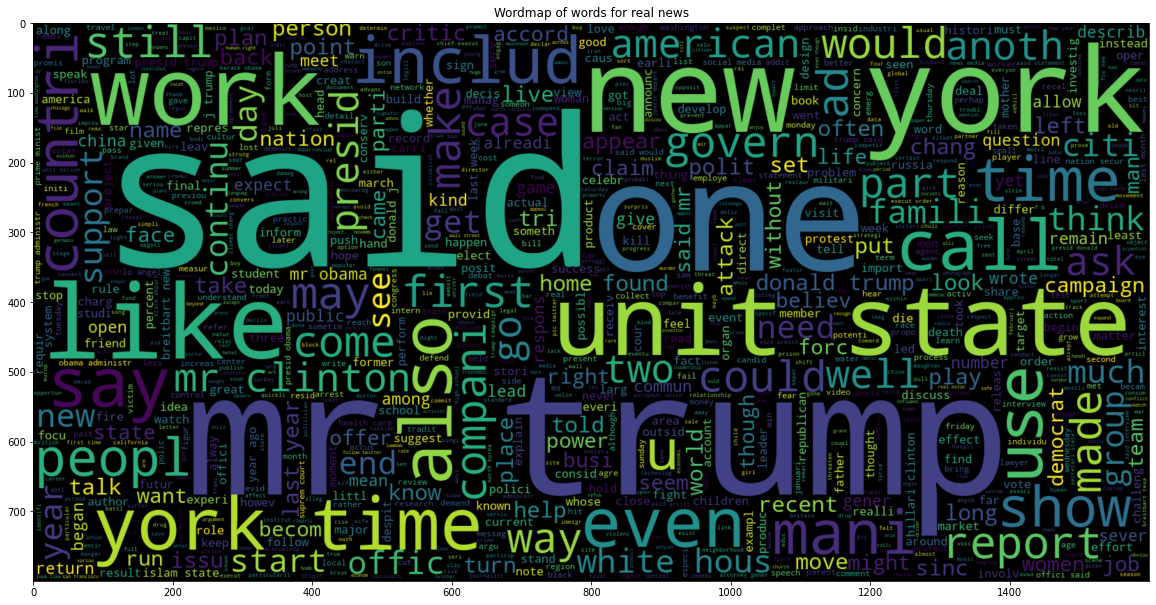

In [16]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
wordCloud = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(train[train["label"] == 0]["cleaned"]))
plt.title("Wordmap of words for real news")
plt.imshow(wordCloud, interpolation = "bilinear")

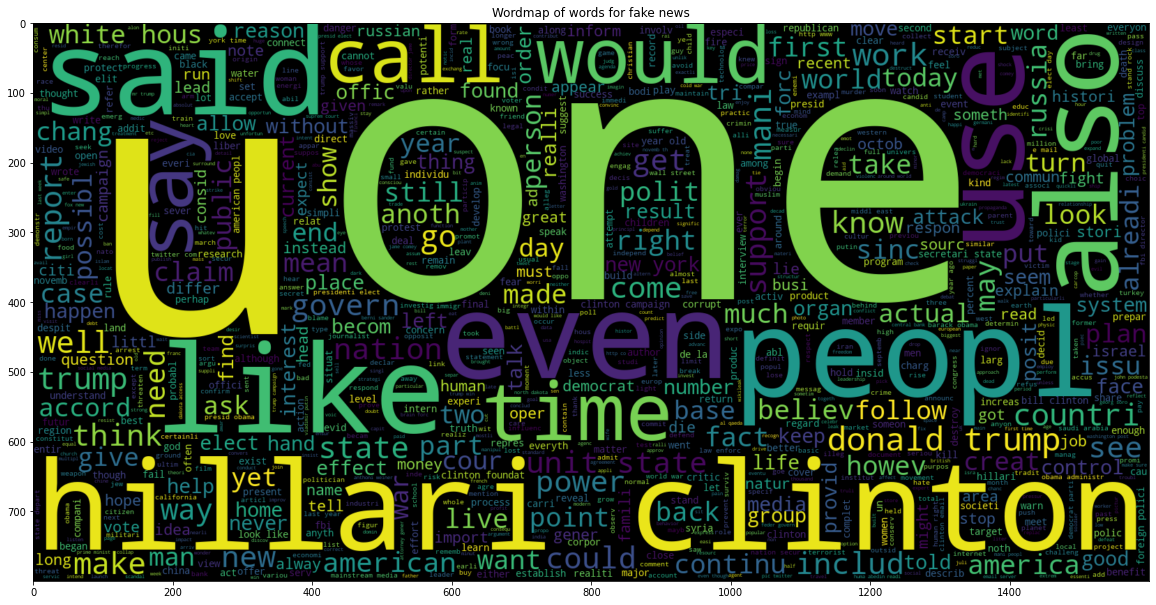

In [17]:
plt.figure(figsize=(20,20))
wordCloud = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(train[train["label"] == 1]["cleaned"]))
plt.title("Wordmap of words for fake news")
plt.imshow(wordCloud, interpolation = "bilinear")

In [18]:
# prepare data for training
y_train = np.asarray(train.label)
X_train = train["cleaned"]

# <u><font color="red">Training the model</font></u>

In [19]:
# modelling LSTM
import tensorflow as tf

import keras
from keras import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# word tokenizer
vocab_size = 20000
embedding_dim = 120

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)


# padding the vectors
padded_train = pad_sequences(train_sequences, maxlen = 40, padding = 'post', truncating = 'post')

# defining model LSTM bidirectional model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 120)         2400000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               127488    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,544,129
Trainable params: 2,544,129
Non-trainable params: 0
______________________________________________

In [20]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [21]:
# perform training on the train data

from sklearn.model_selection import train_test_split

# splitting data for cross validation
x_train, x_test, y_train, y_test = train_test_split(padded_train, y_train, test_size=0.20, random_state=42)
model_trained = model.fit(x_train, y_train, batch_size = 64, validation_data=(x_test,y_test), epochs = 20)

Epoch 1/20
229/229 [==============================] - 36s 156ms/step - loss: 0.2009 - accuracy: 0.9101 - val_loss: 0.1200 - val_accuracy: 0.9562
Epoch 2/20
229/229 [==============================] - 34s 149ms/step - loss: 0.0475 - accuracy: 0.9871 - val_loss: 0.1445 - val_accuracy: 0.9546
Epoch 3/20
229/229 [==============================] - 34s 147ms/step - loss: 0.0214 - accuracy: 0.9947 - val_loss: 0.1995 - val_accuracy: 0.9554
Epoch 4/20
229/229 [==============================] - 34s 149ms/step - loss: 0.0146 - accuracy: 0.9964 - val_loss: 0.1872 - val_accuracy: 0.9442
Epoch 5/20
229/229 [==============================] - 34s 148ms/step - loss: 0.0163 - accuracy: 0.9957 - val_loss: 0.2533 - val_accuracy: 0.9516
Epoch 6/20
229/229 [==============================] - 34s 147ms/step - loss: 0.0155 - accuracy: 0.9960 - val_loss: 0.1793 - val_accuracy: 0.9508
Epoch 7/20
229/229 [==============================] - 35s 154ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.2666 - val_ac

In [30]:
len(x_test)

3657

In [31]:
len(x_train)

14628

# <u><font color="red">Testing the model</font></u>

In [22]:
# perform on test data
test_id = test.id

test = test.drop(["id"], axis = 1)
test.head()

,title,author,text
0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [23]:
# applying preprocessing to the test data
# merging the texts title and text
test["whole_text"] = test.title  + " " + test.text
# filling nas since we cannot drop
test.fillna(method = "ffill", inplace = True)

test.isnull().sum()

title         0
author        0
text          0
whole_text    0
dtype: int64

In [24]:
test.shape

(5200, 4)

In [26]:
# apply preprocessing to test data
test["cleaned"] = test["whole_text"].apply(preprocess)

X_test = test["cleaned"]

test_sequences = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

pred = model.predict_classes(padded_test)

pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [27]:
# forming submission file
# submission file must have 2 columns
# id
# label 1, 0

test_labels = []
for i in pred:
    test_labels.append(i[0])

submission = pd.DataFrame({"id": test_id, "label": test_labels})

submission.shape

(5200, 2)

In [28]:
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [29]:
submission.to_csv("Submission.csv",index=False)

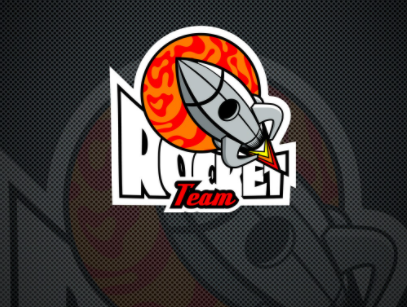